<a href="https://colab.research.google.com/github/lourdesvera/Community_Air_Montoring/blob/master/wunderground_scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VOC Conversions and Threshold Comparisons**

## Installing libraries

In [ ]:
install.packages('tidyverse')
install.packages('googlesheets4')
install.packages('naniar')
install.packages('datetime')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gargle’, ‘googledrive’, ‘ids’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘visdat’, ‘viridis’, ‘UpSetR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importing libraries

In [ ]:
library(tidyverse)
library(googlesheets4)
library(naniar)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



##Import Data

In [ ]:
# Parameters
gs4_deauth()

  # Sheet ID for Gapminder example
  #results from testing
id <- "1XGGJ15QhHxSQFGj6uQMIEAcseaRSmX50xLLWEbi9-44"
data <- read_sheet(ss = id)
#threshold directory
id2 <- "1a-AqhxRlWil1Gy6i6PvtsZdyEjZ-Blhb_aX4sdoVjzw"
info <- read_sheet(ss= id2)

Reading from "VOC_analysis.csv"

Range "VOC_data.csv"

Reading from "compound_threshold_directory"

Range "Table of Contents "

New names:
* `` -> ...2
* `` -> ...3



##Duplicate Check

TXBVOC5b_ugm3 - TXBVOC5a_ugm3

A.1.C - A.1.D

A.2.E - A.2.F

A.3.E - A.3.F

A.1.A - A.1.B

In [ ]:
#Round 1
wilcox.test(data$TXBVOC5b_ugm3, data$TXBVOC5a_ugm3)

Warning message in wilcox.test.default(data$TXBVOC5b_ugm3, data$TXBVOC5a_ugm3):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$TXBVOC5b_ugm3 and data$TXBVOC5a_ugm3
W = 589, p-value = 0.3043
alternative hypothesis: true location shift is not equal to 0


In [ ]:
#Round 2
wilcox.test(data$TXA.1.A_ugm3, data$TXA.1.B_ugm3)

Warning message in wilcox.test.default(data$TXA.1.A_ugm3, data$TXA.1.B_ugm3):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$TXA.1.A_ugm3 and data$TXA.1.B_ugm3
W = 509, p-value = 0.9732
alternative hypothesis: true location shift is not equal to 0


In [ ]:
#Round 3
wilcox.test(data$TXA.1.C_ugm3, data$TXA.1.D_ugm3)

Warning message in wilcox.test.default(data$TXA.1.C_ugm3, data$TXA.1.D_ugm3):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$TXA.1.C_ugm3 and data$TXA.1.D_ugm3
W = 645.5, p-value = 0.07346
alternative hypothesis: true location shift is not equal to 0


In [ ]:
#Round 4
wilcox.test(data$TXA.2.E_ugm3, data$TXA.2.F_ugm3)

Warning message in wilcox.test.default(data$TXA.2.E_ugm3, data$TXA.2.F_ugm3):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$TXA.2.E_ugm3 and data$TXA.2.F_ugm3
W = 485.5, p-value = 0.7264
alternative hypothesis: true location shift is not equal to 0


In [ ]:
#Round 4
wilcox.test(data$TXA.3.E_ugm3, data$TXA.3.F_ugm3)

Warning message in wilcox.test.default(data$TXA.3.E_ugm3, data$TXA.3.F_ugm3):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$TXA.3.E_ugm3 and data$TXA.3.F_ugm3
W = 520.5, p-value = 0.9143
alternative hypothesis: true location shift is not equal to 0


##Blank Check

In [ ]:
#average of blank
data$blank.average <- data %>% 
select(starts_with("FB.")) %>%
rowMeans()

In [ ]:
mean(data$blank.average)

[1] 0.035875

In [ ]:
wilcox.test(data$FB.TXB.8.B_ugm3, 0)

Warning message in wilcox.test.default(data$FB.TXB.8.B_ugm3, 0):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$FB.TXB.8.B_ugm3 and 0
W = 22, p-value = 0.5009
alternative hypothesis: true location shift is not equal to 0


In [ ]:
wilcox.test(data$FB.TXBVOC1a_ugm3, 0)

Warning message in wilcox.test.default(data$FB.TXBVOC1a_ugm3, 0):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$FB.TXBVOC1a_ugm3 and 0
W = 24.5, p-value = 0.3718
alternative hypothesis: true location shift is not equal to 0


In [ ]:
wilcox.test(data$FB.TXFB1_ugm3, 0)

Warning message in wilcox.test.default(data$FB.TXFB1_ugm3, 0):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$FB.TXFB1_ugm3 and 0
W = 28, p-value = 0.221
alternative hypothesis: true location shift is not equal to 0


In [ ]:
wilcox.test(data$FB.TXFB2_ugm3, 0)

Warning message in wilcox.test.default(data$FB.TXFB2_ugm3, 0):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$FB.TXFB2_ugm3 and 0
W = 23, p-value = 0.4451
alternative hypothesis: true location shift is not equal to 0


In [ ]:
wilcox.test(data$FB.TXFB3_ugm3, 0)

Warning message in wilcox.test.default(data$FB.TXFB3_ugm3, 0):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data$FB.TXFB3_ugm3 and 0
W = 23, p-value = 0.4474
alternative hypothesis: true location shift is not equal to 0


##Adjust by Blanks

In [ ]:
data_blank_adj<- data %>% mutate(across(contains(c("TX", "FB")),~.-blank.average))

##Combine Sheets

In [ ]:
data2 <- merge(data_blank_adj, info, by="Name")

ERROR: ignored

##Create Conversion Factor

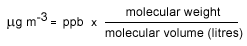

image.png

In [ ]:
#temperature
data2$temp_k <- ((data2$temp_f-32) * 5/9) + 273.15
#molecular volume
data2$mol_vol <- 22.41* (data2$temp_k/273) * (1013/data2$pressure_hpa)
#conversion factor for ug/3 to ppb
data2$conv <- (data2$mol_mass)/(data2$mol_vol)

ERROR: ignored

##Save sheet



In [ ]:
write.csv(data2, "data_blank_adj.csv")

##Convert ug/m3 to ppb

In [ ]:
#data2$conv <- 1/data2$conv

In [ ]:
#data_ppb <- data2 %>% mutate(across(starts_with("TX"),~.*conv))

In [ ]:
#did it work?

##Compare to Thresholds

In [ ]:
colnames(data2)

In [ ]:
#divide values by regulatory thresholds
data3 <- data2 %>% mutate(across(contains(c("TX", "FB")),~./EPA_chronic_threshold_ugm3))

In [ ]:
just_results <- data3 %>%
select(contains(c("Name", "TX")))

In [ ]:
#Authorizations
  # bring your own app via client id (aka key) and secret

  # confirm the changes

In [ ]:
#save results sheet
write.csv(just_results, "just_results_EPA.csv")

In [ ]:
over_thresh <- just_results %>% replace_with_na_at(.vars = c(2:37),
                     condition = ~.x < 0.5)

In [ ]:
over_thresh

In [ ]:
#save over threshold sheet

In [ ]:
#adjust by blank (look up how to)
str(just_results)

In [ ]:
over_thresh %>% select_if(~sum(!is.na(.)) > 0)


* Blanks
* Duplicates
* Results from 2018 by location
* Results from 2020 by location
* map for each location? 2018 and 2020
* differences in setbacks for other rounds?
* differences in pre-covid vs. post-covid
* Omniscent data comparison 
* TCEQ data